In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
premier = pd.read_csv('eplmatches.csv')

In [4]:
premier["HomeGoals"]= "Home_Goals"
premier["AwayGoals"]= "Away_Goals"

In [5]:
premier.head()

,Season_End_Year,Wk,Date,Home,Home_Goals,Away_Goals,Away,FTR,HomeGoals,AwayGoals
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H,Home_Goals,Away_Goals
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H,Home_Goals,Away_Goals
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H,Home_Goals,Away_Goals
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D,Home_Goals,Away_Goals
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A,Home_Goals,Away_Goals


In [6]:
pd.to_datetime(premier.Date)

0       1992-08-15
1       1992-08-15
2       1992-08-15
3       1992-08-15
4       1992-08-15
           ...    
11641   2021-10-23
11642   2021-10-23
11643   2021-10-24
11644   2021-10-24
11645   2021-10-24
Name: Date, Length: 11646, dtype: datetime64[ns]

In [7]:
premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11646 entries, 0 to 11645
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  11646 non-null  int64 
 1   Wk               11646 non-null  int64 
 2   Date             11646 non-null  object
 3   Home             11646 non-null  object
 4   Home_Goals       11646 non-null  int64 
 5   Away_Goals       11646 non-null  int64 
 6   Away             11646 non-null  object
 7   FTR              11646 non-null  object
 8   HomeGoals        11646 non-null  object
 9   AwayGoals        11646 non-null  object
dtypes: int64(4), object(6)
memory usage: 910.0+ KB


## Which Team from 1995 has the most Home Goals?


In [8]:
best_team = premier[premier['Season_End_Year']==1995]
best_team[['Home','Home_Goals']].max()

Home          Wimbledon
Home_Goals            9
dtype: object

## Compute the average number of Away goals for Norwich

In [9]:
norwich_away = premier[premier.Away=="Norwich City"]
norwich_away['Away_Goals'].mean()

0.8877551020408163

## How many Home goals does Manchester United have?

In [26]:
man_u = premier[(premier.Home == "Manchester United") & (premier.Season_End_Year !=2022)]
man_u['Home_Goals'].head()

Series([], Name: Home_Goals, dtype: int64)

## Compute the number of Home wins, Draws, and Losses by Week

In [11]:
weekly_count = premier.groupby(premier.Date)["Wk","FTR"].value_counts()
weekly_count.head(30)

C:\Users\Owner\AppData\Local\Temp\ipykernel_7708\793531217.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_count = premier.groupby(premier.Date)["Wk","FTR"].value_counts()


Date        Wk  FTR
1992-08-15  1   D      5
                H      3
                A      1
1992-08-16  1   H      1
1992-08-17  1   D      1
1992-08-18  2   A      1
                H      1
1992-08-19  2   H      5
                A      2
                D      2
1992-08-22  3   D      5
                H      4
                A      1
1992-08-23  3   A      1
1992-08-24  4   A      1
1992-08-25  4   D      3
                H      2
1992-08-26  4   H      2
                A      1
                D      1
1992-08-29  5   A      4
                H      3
                D      3
1992-08-30  5   D      1
1992-08-31  6   H      1
1992-09-01  6   D      3
                A      1
1992-09-02  6   H      2
                A      2
                D      1
dtype: int64

## How many Home Goals and Away Goals does Sheffield United have?

In [12]:
sheffield = premier.groupby(premier.FTR)["Date","Home_Goals", "Away_Goals"].value_counts()
sheffield.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_7708\2219247066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sheffield = premier.groupby(premier.FTR)["Date","Home_Goals", "Away_Goals"].value_counts()


FTR  Date        Home_Goals  Away_Goals
A    2017-11-04  0           1             3
     2009-08-15  0           2             3
     2004-05-15  0           2             3
     1999-08-07  0           1             3
     2004-09-25  0           1             3
dtype: int64

# Graph the number of Away Goals for Teams in 2020

Text(0.5, 1.0, 'Away Goals in 2020')

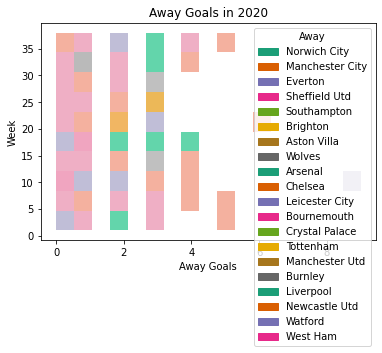

In [13]:
covid_year = premier[premier['Season_End_Year'] == 2020]
sns.histplot(x=covid_year['Away_Goals'], y = covid_year.Wk, data= premier, hue=covid_year.Away, palette= "Dark2")
plt.xlabel("Away Goals")
plt.ylabel("Week")
plt.title("Away Goals in 2020")

## Plot the average number of Home Goals vs. Team

Text(0.5, 0, 'Home Goals')

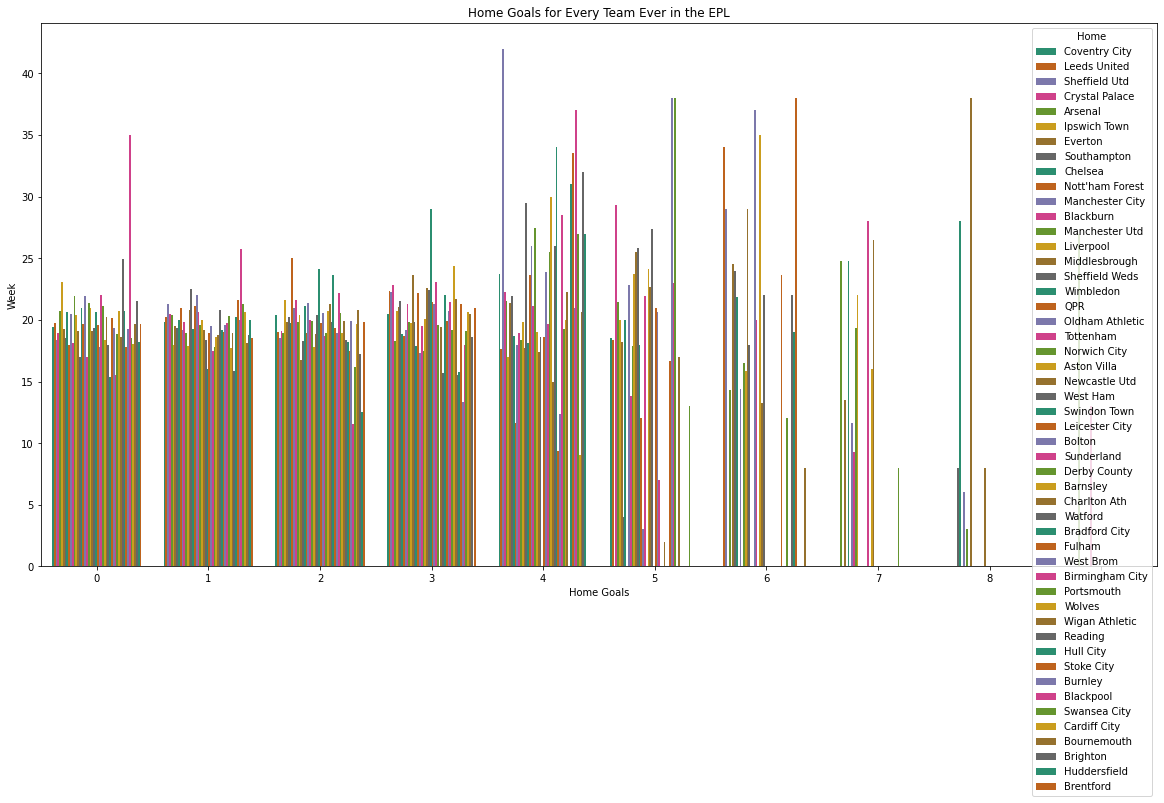

In [14]:
plt.figure(figsize=(20,10))

premier.groupby("Home").Home_Goals.mean()
sns.barplot(x= premier['Home_Goals'], y= premier.Wk, data=premier, hue=premier.Home, palette= "Dark2", ci = False)
plt.title("Home Goals for Every Team Ever in the EPL")
plt.ylabel("Week")
plt.xlabel("Home Goals")

## What is the total number of Home Goals vs. Away Goals for Brighton?


Text(0, 0.5, 'Home Goals')

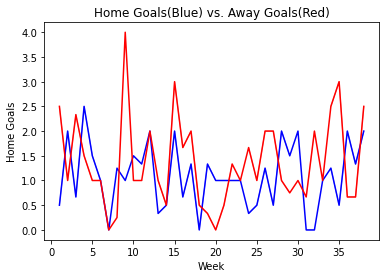

In [15]:
brighton_home = premier[(premier.Home == "Brighton")]
sns.lineplot(x=brighton_home.Wk, y=brighton_home['Home_Goals'], data = premier, color = "Blue", ci = False)
sns.lineplot(x=brighton_home.Wk, y=brighton_home['Away_Goals'], data=premier, color = "Red", ci = False)
plt.title("Home Goals(Blue) vs. Away Goals(Red)")
plt.xlabel("Week")
plt.ylabel("Home Goals")


## What are the number of away goals for each year as a scatterplot?

<AxesSubplot:xlabel='Season_End_Year', ylabel='Away_Goals'>

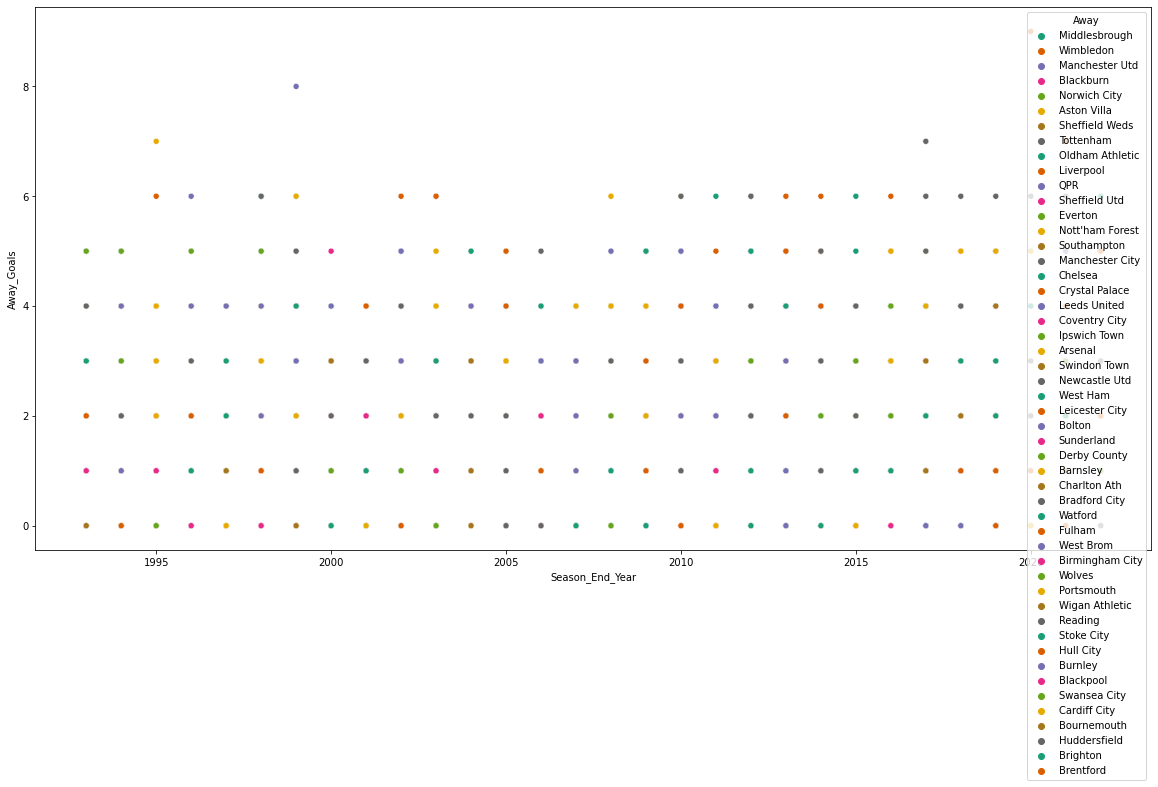

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=premier['Season_End_Year'], y= premier['Away_Goals'], data= premier, hue= premier['Away'], palette= "Dark2", ci = False)